In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [70]:
data = pd.read_csv(r'C:\Users\miray\OneDrive\Desktop\ML\ML LAB\weight_height_dataset.csv')

In [71]:
data.head()

,Height(cm),Weight(kg),Class
0,171.408421,69.037935,Normal
1,153.935688,47.797508,Underweight
2,176.573961,78.871438,Overweight
3,170.663093,70.263714,Normal
4,164.009912,68.730922,Normal


In [72]:
print("Shape of dataset:", data.shape)


Shape of dataset: (150, 3)


Class Distribution:
 Class
Normal         50
Underweight    50
Overweight     50
Name: count, dtype: int64


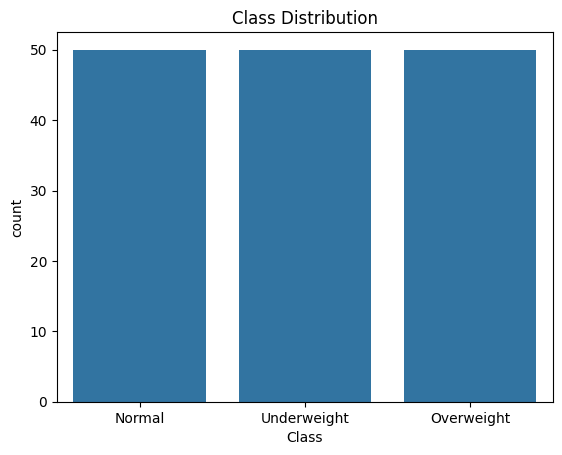

In [73]:
print("Class Distribution:\n", data['Class'].value_counts())
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()

In [75]:
print(data.describe())


       Height(cm)  Weight(kg)
count  150.000000  150.000000
mean   167.999664   70.351134
std      8.292751   12.943625
min    149.287071   44.449246
25%    161.641387   58.658999
50%    167.716103   70.520422
75%    174.739125   81.627888
max    188.475925   96.839584


In [76]:
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])
class_names = label_encoder.classes_


In [77]:
X = data[['Height(cm)', 'Weight(kg)']]
y = data['Class']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [81]:
y_pred = knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 93.33%

Classification Report:
               precision    recall  f1-score   support

      Normal       0.88      0.93      0.90        15
  Overweight       1.00      0.87      0.93        15
 Underweight       0.94      1.00      0.97        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



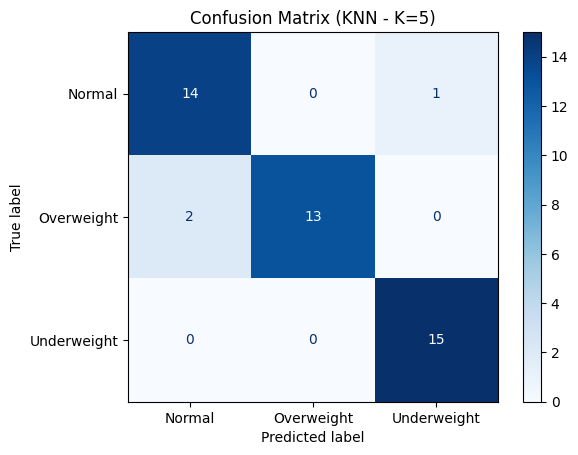

In [82]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN - K=5)")
plt.show()


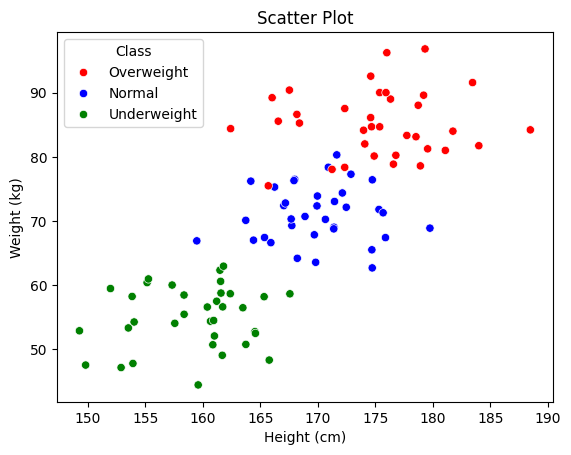

In [97]:
df_vis = pd.DataFrame(X_train, columns=['Height(cm)', 'Weight(kg)'])
df_vis['Class'] = y_train
df_vis['Class'] = df_vis['Class'].apply(lambda x: class_names[x])
sns.scatterplot(data=df_vis, x='Height(cm)', y='Weight(kg)', hue='Class', palette=['red', 'blue', 'green'])
plt.title('Scatter Plot')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Class')
plt.show()
